## Логістична регресія

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

%matplotlib inline

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ', data.shape)
    print(data[1:6, :])
    return data

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='x', c='green', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='darkorange', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [4]:
data = loaddata('data1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


In [5]:
X = np.c_[np.ones((data.shape[0], 1)), data[:,0:2]]
y = np.c_[data[:,2]]

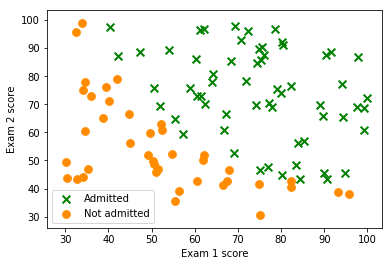

In [6]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

Загальний вигляд моделі логістичної регресії
$$ a_{\Theta}(x) = \sigma(X\Theta)$$
$$ \sigma(z)=\frac{1}{1+e^{−z}} $$¶

In [7]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

Функція вартості логістичної регресії
$$ J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( a_\Theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-a_\Theta(x^{(i)}))\big]$$
Функція вартості у векторизованому вигляді
$$ J(\Theta) = \frac{1}{m}\big(-y^T\,log\,(\sigma(X\Theta))-(1-y)^T(\,log\,(1-\sigma(X\Theta))\big)$$

In [8]:
def costFunction(Theta, X, y):
    m = y.size
    
    a = sigmoid(np. dot(X, Theta))
    
    J = (1/m)*(np.dot(-y.T, np.log(a)) - np.dot((1 - y).T, np.log(1 - a)))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

Градієнт функції втрат у векторизованому вигляді
$$ \nabla J(\Theta) = \frac{1}{m} X^T(\sigma(X\Theta)-y)$$

In [9]:
def gradient(Theta, X, y):
    m = y.size
    
    a = sigmoid(np.dot(X, Theta.reshape(-1,1)))
    
    grad = (1/m) * np.dot(X.T, a - y)

    return(grad.flatten())

In [10]:
init_Theta = np.zeros(X.shape[1])

In [11]:
# Визначимо значення функції вартості та градієнта цієї функції для початкових значень параметрів моделі
cost = costFunction(init_Theta, X, y)
grad = gradient(init_Theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599452
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [12]:
res = minimize(costFunction, init_Theta, args=(X, y), method=None, jac=gradient, options={'maxiter':400})
res

C:\Users\Aleks_Iv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Aleks_Iv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


      fun: 0.20349770158950983
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557631e-09,  4.36433478e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [13]:
def predict(Theta, X, threshold=0.5):
    p = sigmoid(np.dot(X, Theta)) >= threshold
    return(p.astype('int'))

In [14]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

0.7762903249331015

In [15]:
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


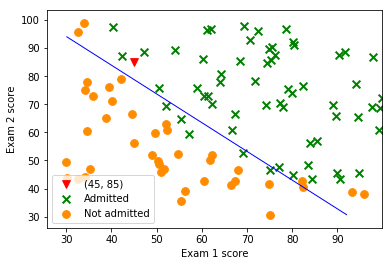

In [16]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
a = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
a = a.reshape(xx1.shape)
plt.contour(xx1, xx2, a, [0.5], linewidths=1, colors='b');